In [92]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/users/b149899/projects/binder/binder/keys/nav_opendata.json'

In [93]:
import altair as alt
import pandas as pd
import numpy as np
import requests
import altair as alt
alt.data_transformers.enable('json')
from altair.expr import datum, substring
from vega_datasets import data
alt.renderers.enable('notebook')

import dataverk as dv

In [94]:
readme = """
# Altair demo: Examples

"""

url = 'https://raw.githubusercontent.com/datasett/nav-examples/altair-choropleths-norway'
auth = 'paul.bencze@nav.no'

metadata = {
'store': 'gs',
'host': url,
'accessRights': 'Open',
'author': auth,
'category': 'Åpne data',
'created_by': 'paul.bencze@nav.no',
'description': 'Altair demo: Examples',
'distribution': [{'format': 'datapackage','url': url}],
'format': 'datapackage',
'haspart': [],
'issued': '2019-08-14T11:14:26.802809',
'keywords': ['datasett'],
'legalbasis': ['Åpne data'],
'master': 'NAV',
'pii': 'Åpne data',
'policy': [{'legal_basis': 'Offentlighetsloven','purpose': 'Åpne data'}],
'provenance': 'Kartverket og SSB',
'publisher': 'NAV',
'purpose': ['Åpne data'],
'spatial': 'Norge',
'theme': ['Åpne data'],
'title': 'Altair demo: Examples',
'type': 'datakatalog',
'url': url,
'project': 'odata', 
'user':'nav-examples',
'repo': 'https://raw.githubusercontent.com/datasett/nav-examples/altair-choropleths-norway',
'bucket': 'nav-opendata'
}

In [95]:
dp = dv.Datapackage(metadata)

In [96]:
data.population.url

'https://vega.github.io/vega-datasets/data/population.json'

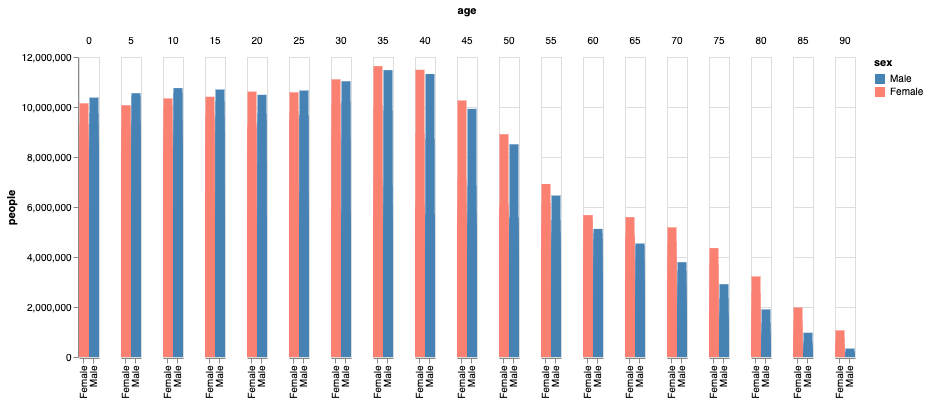

In [97]:
from altair.expr import datum, if_

pop = data.population.url

pink_blue = alt.Scale(domain=('Male', 'Female'),
                      range=["steelblue", "salmon"])

slider = alt.binding_range(min=1900, max=2000, step=10)
year = alt.selection_single(name="year", fields=['year'], bind=slider)

fig = alt.Chart(pop).mark_bar().encode(
    x=alt.X('sex:N', axis=alt.Axis(title=None)),
    y=alt.Y('people:Q', scale=alt.Scale(domain=(0, 12000000))),
    color=alt.Color('sex:N', scale=pink_blue),
    column='age:O'
).properties(
    width=20,
    selection=year,
).transform_calculate(
    "sex", if_(datum.sex == 1, "Male", "Female")
).transform_filter(
    year.ref()
)

fig

In [98]:
description = '''
US population
'''

dp.add_view(
    spec_type='vega',
    name='US population',
    title='US population',
    description = description,
    resources=[],
    attribution = "Kilde: Atltair examples",
    spec=fig.to_json()
)

In [99]:
 data.barley.url

'https://vega.github.io/vega-datasets/data/barley.json'

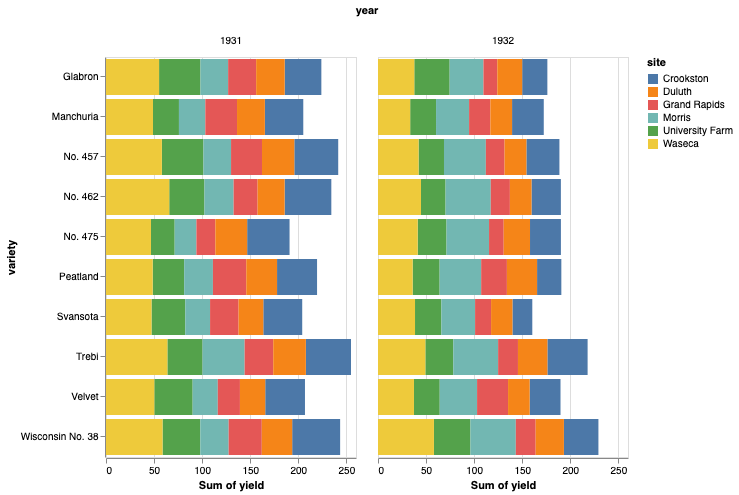

In [100]:
barley = data.barley.url

fig = alt.Chart(barley).mark_bar().encode(
    column='year:N',
    x='sum(yield):Q',
    y='variety:O',
    color='site:N'
).properties(
    width=250,
    height=400
)

fig

In [101]:
description = '''
Wheat types
'''

dp.add_view(
    spec_type='vega',
    name='Wheat types',
    title='Wheat types',
    description = description,
    resources=['barley'],
    attribution = "Kilde: Atltair examples",
    spec=fig.to_json()
)

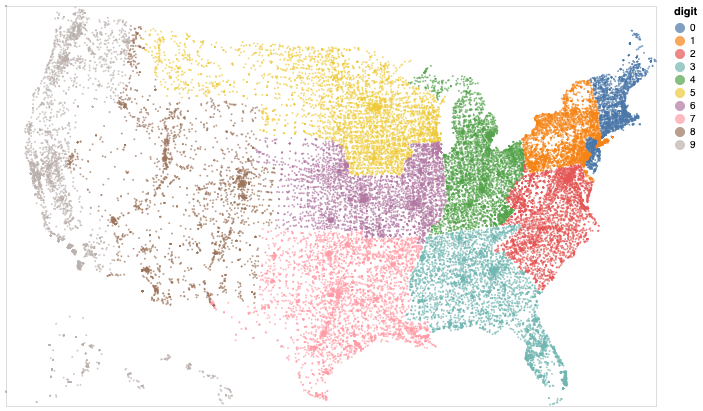

In [102]:
zipcodes = data.zipcodes.url

fig = alt.Chart(zipcodes).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='digit:N'
).project(
    type='albersUsa'
).properties(
    width=650,
    height=400
).transform_calculate(
    "digit", substring(datum.zip_code, 0, 1)
)

fig

In [103]:
description = '''
US Zipcodes
'''

dp.add_view(
    spec_type='vega',
    name='US Zipcodes',
    title='US Zipcodes',
    description = description,
    resources=[],
    attribution = "Kilde: Atltair examples",
    spec=fig.to_json()
)

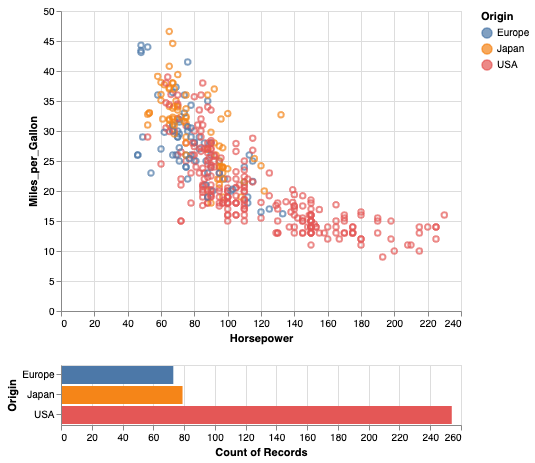

In [104]:
cars = data.cars.url

brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).properties(
    selection=brush
)

bars = alt.Chart().mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush.ref()
)

fig = alt.vconcat(points, bars, data=cars)
fig

In [105]:
description = '''
Cars fuel consumption
'''

dp.add_view(
    spec_type='vega',
    name='Cars fuel consumption',
    title='Cars fuel consumption',
    description = description,
    resources=[],
    attribution = "Kilde: Atltair examples",
    spec=fig.to_json()
)

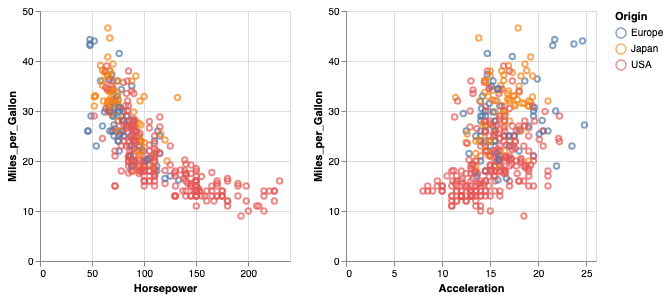

In [106]:
cars = data.cars.url

brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(cars).mark_point().encode(
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.ColorValue('gray'))
).properties(
    selection=brush,
    width=250,
    height=250
)

fig = base.encode(x='Horsepower:Q') | base.encode(x='Acceleration:Q')
fig

In [107]:
description = '''
Cars horesepower vs acceleration
'''

dp.add_view(
    spec_type='vega',
    name='Cars horesepower vs acceleration',
    title='Cars horesepower vs acceleration',
    description = description,
    resources=[],
    attribution = "Kilde: Atltair examples",
    spec=fig.to_json()
)

In [108]:
np.random.seed(42)
sample = pd.DataFrame(np.cumsum(np.random.randn(100, 3), 0).round(2),
                    columns=['A', 'B', 'C'], index=pd.RangeIndex(100, name='x'))
sample = sample.reset_index().melt('x', var_name='category', value_name='y')

dp.add_resource(sample,'multilayer_example_csv', format='csv')
dp.add_resource(sample,'multilayer_example_json',format='json')

sample.head()

,x,category,y
0,0,A,0.50
1,1,A,2.02
2,2,A,3.60
3,3,A,4.14
4,4,A,4.38


In [109]:
url = "https://storage.googleapis.com/nav-opendata/ca7bb6616807eb45c40460de68c7586c/resources/multilayer_example_csv.csv"
sample = requests.get(url).text

In [110]:
pd.read_csv(url).head()

,x,category,y
0,0,A,0.50
1,1,A,2.02
2,2,A,3.60
3,3,A,4.14
4,4,A,4.38


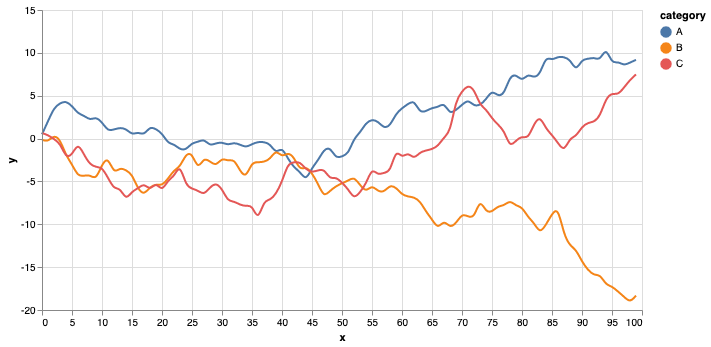

In [111]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

# The basic line
line = alt.Chart().mark_line(interpolate='basis').encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).properties(
    selection=nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'y:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest.ref()
)

# Put the five layers into a chart and bind the data
fig = alt.layer(line, selectors, points, rules, text,
          data=url, width=600, height=300)
fig

In [112]:
description = '''
Multilayer example
'''

dp.add_view(
    spec_type='vega',
    name='Multilayer example',
    title='Multilayer example',
    description = description,
    resources=['multilayer_example'],
    attribution = "Kilde: Atltair examples",
    spec=fig.to_json()
)

In [113]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [114]:
sample = data.seattle_weather.url
sample

'https://vega.github.io/vega-datasets/data/seattle-weather.csv'

In [115]:
scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'])

brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    alt.X('temp_max:Q', title='Maximum Daily Temperature (C)'),
    alt.Y('temp_range:Q', title='Daily Temperature Range (C)'),
    color=alt.condition(brush, 'weather:N', alt.value('lightgray'), scale=scale),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[1, 200]))
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).properties(
    width=600,
    height=400
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='weather:N',
    color=alt.Color('weather:N', scale=scale),
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=600
)

fig = alt.vconcat(points, bars, data=sample)

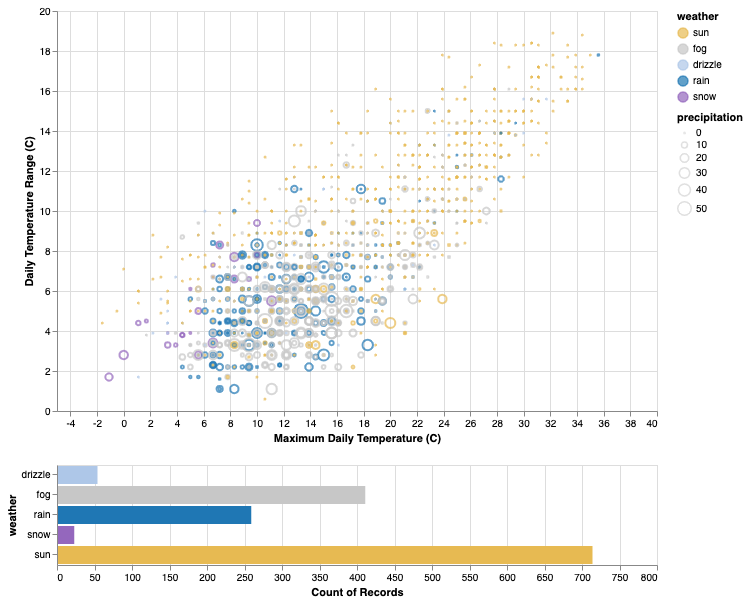

In [116]:
fig

In [117]:
description = '''
Seattle weather
'''

dp.add_view(
    spec_type='vega',
    name='Seattle weather',
    title='Seattle weather',
    description = description,
    resources=[],
    attribution = "Kilde: Atltair examples",
    spec=fig.to_json()
)

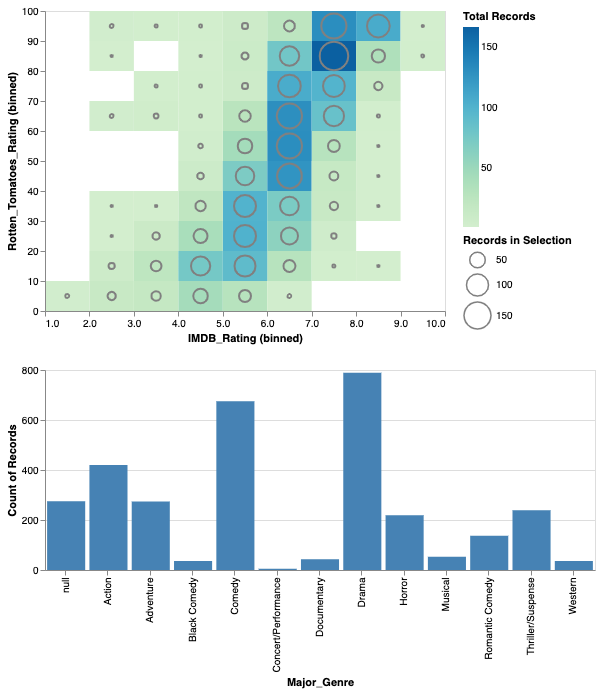

In [118]:
source = data.movies.url

pts = alt.selection(type="single", encodings=['x'])

rect = alt.Chart(data.movies.url).mark_rect().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Records')
    )
)

circ = rect.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='Records in Selection')
    )
).transform_filter(
    pts
)

bar = alt.Chart(source).mark_bar().encode(
    x='Major_Genre:N',
    y='count()',
    color=alt.condition(pts, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=550,
    height=200
).add_selection(pts)

fig = alt.vconcat(
    rect + circ,
    bar
).resolve_legend(
    color="independent",
    size="independent"
)

fig

In [119]:
description = '''
Movies IMDB
'''

dp.add_view(
    spec_type='vega',
    name='Movies IMDB',
    title='Movies IMDB',
    description = description,
    resources=[],
    attribution = "Kilde: Atltair examples",
    spec=fig.to_json()
)

In [120]:
data.flights_2k.url

'https://vega.github.io/vega-datasets/data/flights-2k.json'

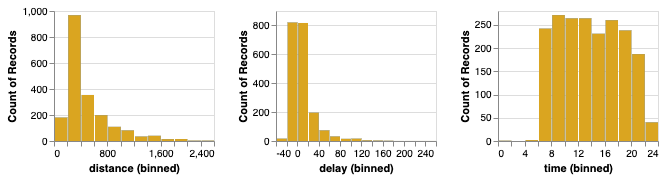

In [121]:
source = alt.UrlData(
    data.flights_2k.url,
    format={'parse': {'date': 'date'}}
)

brush = alt.selection(type='interval', encodings=['x'])

# Define the base chart, with the common parts of the
# background and highlights
base = alt.Chart().mark_bar().encode(
    x=alt.X(alt.repeat('column'), type='quantitative', bin=alt.Bin(maxbins=20)),
    y='count()'
).properties(
    width=160,
    height=130
)

# blue background with selection
background = base.add_selection(brush)

# yellow highlights on the transformed data
highlight = base.encode(
    color=alt.value('goldenrod')
).transform_filter(brush)

# layer the two charts & repeat
fig  = alt.layer(
    background,
    highlight,
    data=source
).transform_calculate(
    "time",
    "hours(datum.date)"
).repeat(column=["distance", "delay", "time"])

fig

In [122]:
description = '''
Crossfilter flights
'''

dp.add_view(
    spec_type='vega',
    name='Crossfilter flights',
    title='Crossfilter flights',
    description = description,
    resources=[],
    attribution = "Kilde: Atltair examples",
    spec=fig.to_json()
)

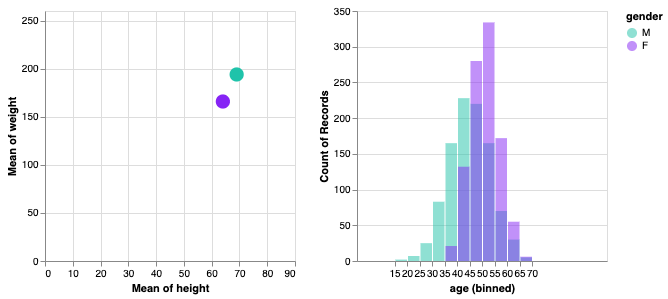

In [123]:
data_url = "https://raw.githubusercontent.com/datasett/examples/master/data/examples/linked_selection.json"

selector = alt.selection_single(empty='all', fields=['gender'])

color_scale = alt.Scale(domain=['M', 'F'],
                        range=['#1FC3AA', '#8624F5'])

base = alt.Chart(data_url).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x=alt.X('mean(height):Q',
            scale=alt.Scale(domain=[0,84])),
    y=alt.Y('mean(weight):Q',
            scale=alt.Scale(domain=[0,250])),
    color=alt.condition(selector,
                        'gender:N',
                        alt.value('lightgray'),
                        scale=color_scale),
).interactive()

hists = base.mark_bar(opacity=0.5, thickness=100).encode(
    x=alt.X('age:Q',
            bin=alt.Bin(step=5), # step keeps bin size the same
            scale=alt.Scale(domain=[0,100])),
    y=alt.Y('count()',
            stack=None,
            scale=alt.Scale(domain=[0,350])),
    color=alt.Color('gender:N',
                    scale=color_scale)
).transform_filter(
    selector
)


fig = points | hists
fig

In [124]:
description = '''
Interactive Scatter Plot and Linked Layered Histogram
'''

dp.add_view(
    spec_type='vega',
    name='Interactive Scatter Plot and Linked Layered Histogram',
    title='Interactive Scatter Plot and Linked Layered Histogram',
    description = description,
    resources=[],
    attribution = "Kilde: Atltair examples",
    spec=fig.to_json()
)

In [125]:
data.stocks.url

'https://vega.github.io/vega-datasets/data/stocks.csv'

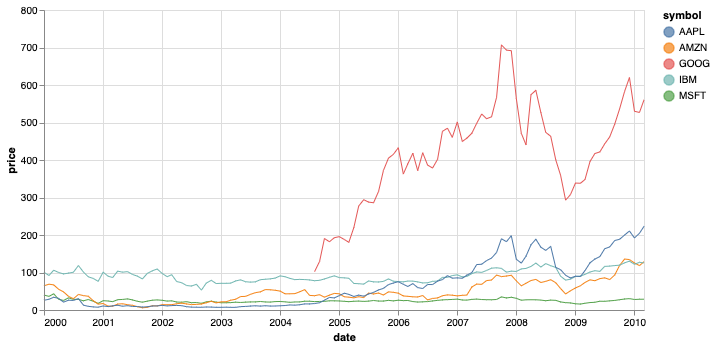

In [129]:
highlight = alt.selection(type='single', on='mouseover',
                          fields=['symbol'], nearest=True)

base = alt.Chart(data.stocks.url).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=600
)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3))
)

fig = points + lines
fig

In [130]:
description = '''
Multi-Line Highlight
'''

dp.add_view(
    spec_type='vega',
    name='Multi-Line Highlight',
    title='Multi-Line Highlight',
    description = description,
    resources=[],
    attribution = "Kilde: Atltair examples",
    spec=fig.to_json()
)

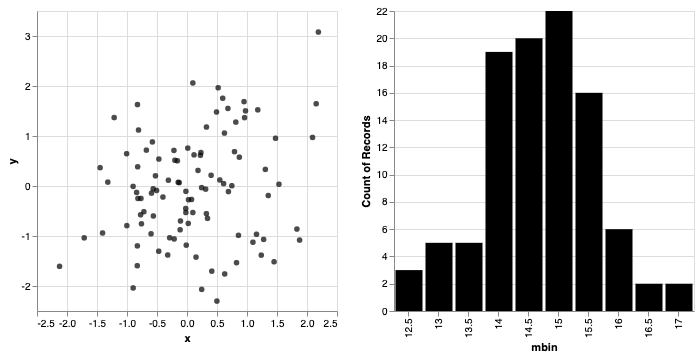

In [132]:
x = np.random.normal(size=100)
y = np.random.normal(size=100)

m = np.random.normal(15, 1, size=100)

source = pd.DataFrame({"x": x, "y":y, "m":m})



# interval selection in the scatter plot
pts = alt.selection(type="interval", encodings=["x"])

# left panel: scatter plot
points = alt.Chart().mark_point(filled=True, color="black").encode(
    x='x',
    y='y'
).transform_filter(
    pts
).properties(
    width=300,
    height=300
)

# right panel: histogram
mag = alt.Chart().mark_bar().encode(
    x='mbin:N',
    y="count()",
    color=alt.condition(pts, alt.value("black"), alt.value("lightgray"))
).properties(
    width=300,
    height=300
).add_selection(pts)

# build the chart:
alt.hconcat(
    points,
    mag,
    data=source
).transform_bin(
    "mbin",
    field="m",
    bin=alt.Bin(maxbins=20)
)

In [131]:
client = dv.Client()
client.publish(dp)

2019-08-26T14:04:38.445857: B149899 <class 'dataverk.connectors.google_storage.GoogleStorageConnector'>: String (format: json) written to https://storage.googleapis.com/nav-opendata/ca7bb6616807eb45c40460de68c7586c/datapackage.json
2019-08-26T14:04:38.945491: B149899 <class 'dataverk.connectors.google_storage.GoogleStorageConnector'>: String (format: csv) written to https://storage.googleapis.com/nav-opendata/ca7bb6616807eb45c40460de68c7586c/resources/multilayer_example_csv.csv
2019-08-26T14:04:39.316452: B149899 <class 'dataverk.connectors.google_storage.GoogleStorageConnector'>: String (format: json) written to https://storage.googleapis.com/nav-opendata/ca7bb6616807eb45c40460de68c7586c/resources/multilayer_example_json.json
2019-08-26T14:04:41.032154: B149899 <class 'dataverk.connectors.elasticsearch.ElasticsearchConnector'>: Document ca7bb6616807eb45c40460de68c7586c of type {'id': 'ca7bb6616807eb45c40460de68c7586c', 'type': 'datakatalog', 'suggest': 'Altair demo: Examples Altair de